In [2]:
import numpy as np
from big_clam import BigClam
from scipy.special import gamma, digamma, gammaln
import networkx as nx
import os, cPickle
from matplotlib import pyplot as plt
from Extends import draw_groups, NMI, GetComms, GetCommsPrev
from Experiments import draw_matrix
from Experiments import *
from big_clam_gamma import BigClamGamma

%matplotlib inline

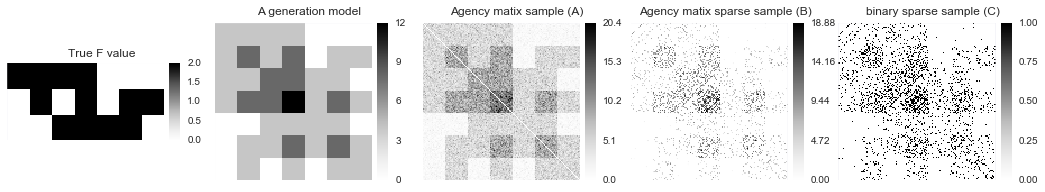

In [24]:
def generate(power = 0.05):
    F_true = Fs3[0]
    A = gamma_model_test_data(F_true)
    P = 1 - np.exp(- power * A)
    rand = np.random.rand(*A.shape)
    mask = P <= (rand + rand.T) / 2

    B = A.copy()
    B[mask] = 0
    C = B.copy()
    C[B != 0] = 1
    return F_true, A, B, C

F_true, A, B, C = generate()
draw_test_sample(F_true, A, B, C)

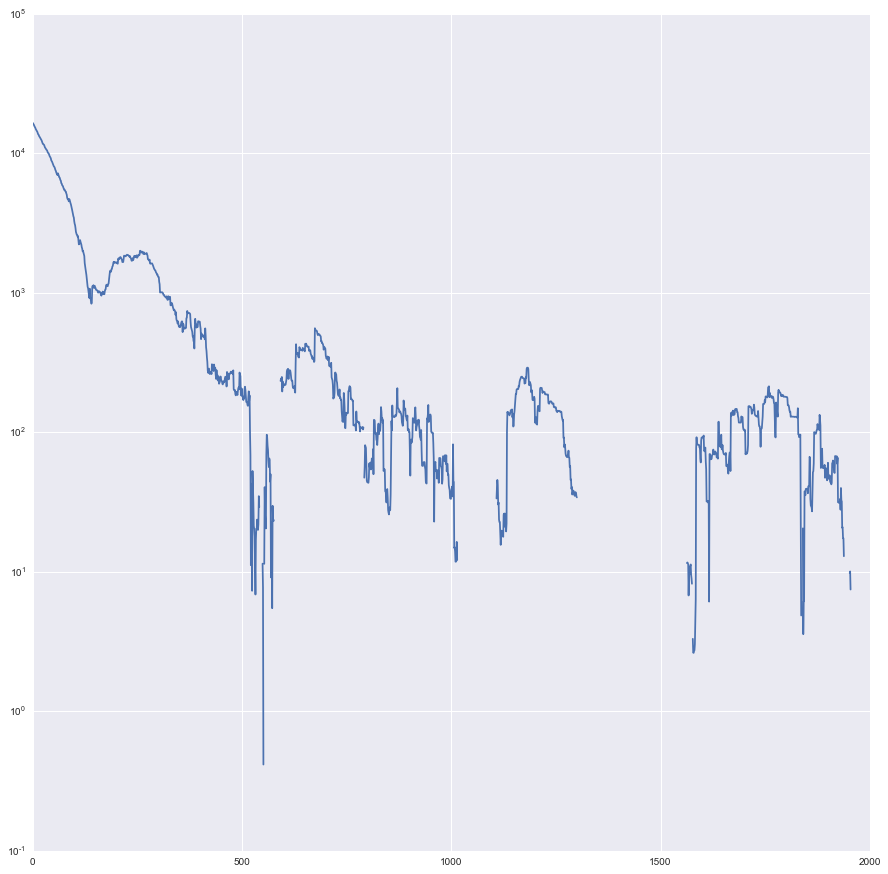

In [47]:
w_model3r = BigClamGamma(B, 3, debug_output=False, LLH_output=False, initF='cond_new_randz_spr', iter_output=1, processesNo=1,
                         rand_init_coef=0.5, stepSizeMod="backtracking", pow=g)
F_model3r, LLH3r = w_model3r.fit()
plt.figure(figsize=(15,15))
y = np.array(w_model3r.LLH_output_vals)
y = -y + y[-1]
plt.semilogy(y)

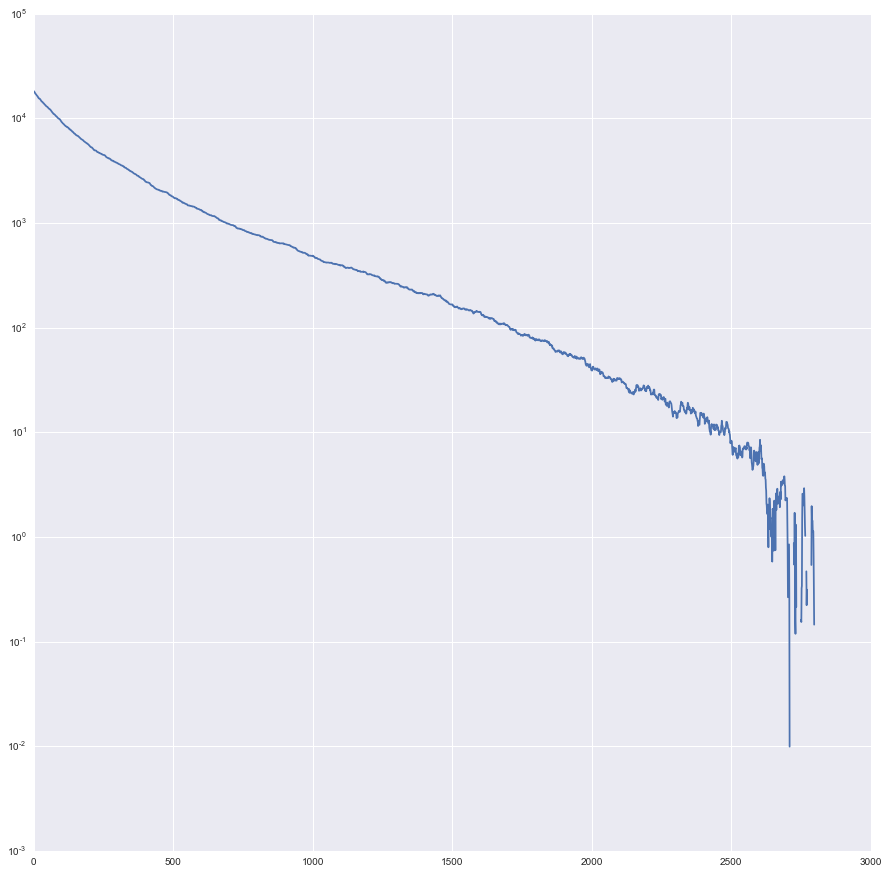

In [45]:
w_model3r = BigClamGamma(B, 3, debug_output=False, LLH_output=False, initF='cond_new_randz_spr', iter_output=1, processesNo=1,
                         rand_init_coef=0.5, stepSizeMod="simple", pow=g)
F_model3r, LLH3r = w_model3r.fit()
plt.figure(figsize=(15,15))
y = np.array(w_model3r.LLH_output_vals)
y = -y + y[-1]
plt.semilogy(y)

In [37]:
dir(w_model3r)

['A',
 'Fbord',
 'K',
 'LLH',
 'LLH_output',
 'LLH_output_vals',
 'N',
 'NIdPhiV',
 'POOL',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alpha',
 'backtrackingLineSearch',
 'calc_penalty',
 'calc_penalty_grad',
 'debug_output',
 'dump',
 'dump_name',
 'dump_self',
 'eps',
 'epsCommForce',
 'fit',
 'fit_known_k',
 'fit_unknown_k',
 'gradient',
 'gradient_w',
 'init',
 'initF',
 'initFmode',
 'initFromSpecified',
 'initNeighborComF',
 'initRandF',
 'init_sumF',
 'iter_output',
 'last_step',
 'logA',
 'loglikelihood',
 'loglikelihood_check',
 'loglikelihood_u',
 'loglikelihood_w',
 'maxF',
 'maxLLH',
 'max_iter',
 'nextNodeToOptimize',
 'noImprCount',
 'not_A',
 'optimize',
 'pool',
 'rand_init_coef',
 'save_hist',
 'sparsity_coef',
 'sqrt_pow',
 'step',
 'stepSize'

iter: 1000, LLH:-19509.7232591
iter: 2000, LLH:-19107.233804
iter: 3000, LLH:-18885.6762216
iter: 4000, LLH:-18717.8074966
iter: 5000, LLH:-18575.8801264
iter: 6000, LLH:-18468.9558042
iter: 7000, LLH:-18391.1631635
iter: 8000, LLH:-18336.1468381
iter: 9000, LLH:-18294.9101638
iter: 10000, LLH:-18260.4737332
iter: 11000, LLH:-18230.3054167
iter: 12000, LLH:-18204.7331118
iter: 13000, LLH:-18180.7078293
iter: 14000, LLH:-18158.9042198
iter: 15000, LLH:-18138.8763956
iter: 16000, LLH:-18122.7915072


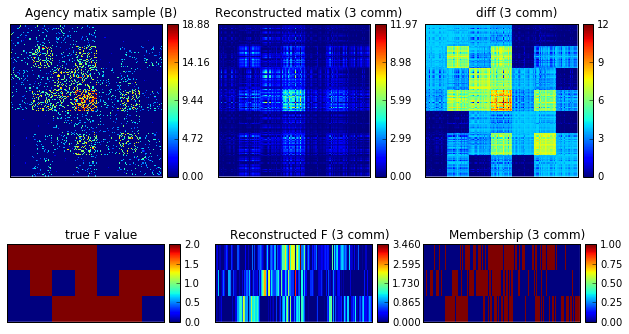

In [3]:
w_model3r = BigClamGamma(B, 3, debug_output=False, LLH_output=True, initF='cond_new_randz_spr', iter_output=1000, processesNo=1,
                         rand_init_coef=0.5, stepSizeMod="simple", pow=0.05)
F_model3r, LLH3r = w_model3r.fit()

draw_res(B, F_true, F_model3r)
plt.show()

In [17]:
pows = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3]
gammas = [0.001, 0.01, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.35, 0.5, 0.8, 1, 2]
Comm_True = GetComms(F_true.T, B)

In [18]:
res = []
for g in log_progress(gammas):
    res.append([])
    for p in pows:
        F_true, A, B, C = generate(p)
        w_model3r = BigClamGamma(B, 3, debug_output=False, LLH_output=False, initF='cond_new_randz_spr', iter_output=1000, processesNo=1,
                                 rand_init_coef=0.5, stepSizeMod="simple", pow=g)
        F_model3r, LLH3r = w_model3r.fit()
        comms = GetComms(F_model3r, B)
        nmi = NMI(comms, None, Comm_True)
        res[-1].append(nmi)

In [1]:
import seaborn as sns
#sns.set_style('white')

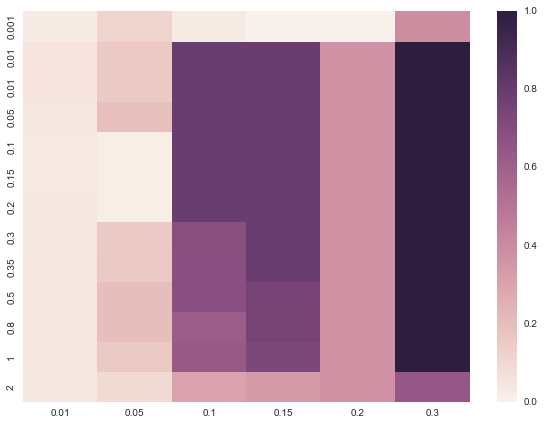

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(res, xticklabels=pows, yticklabels=gammas)

In [22]:
res

[[0.0280416, 0.120889, 0.0297536, 3.11976e-17, 3.11976e-17, 0.391557],
 [0.0505573, 0.158834, 0.792778, 0.792778, 0.378334, 1.0],
 [0.0505573, 0.158834, 0.792778, 0.792778, 0.378334, 1.0],
 [0.0387237, 0.19448, 0.792778, 0.792778, 0.378334, 1.0],
 [0.0317241, 0.0127974, 0.791903, 0.792778, 0.378334, 1.0],
 [0.0346241, 0.0127974, 0.791903, 0.792778, 0.378334, 1.0],
 [0.0358059, 0.0127974, 0.791013, 0.791903, 0.378334, 1.0],
 [0.0358059, 0.156318, 0.687629, 0.791903, 0.378334, 1.0],
 [0.0430238, 0.160192, 0.686598, 0.791903, 0.378334, 1.0],
 [0.046673, 0.200892, 0.684971, 0.754129, 0.378334, 1.0],
 [0.046673, 0.201131, 0.61829, 0.754129, 0.378334, 1.0],
 [0.046673, 0.162831, 0.632668, 0.727273, 0.378334, 1.0],
 [0.0375305, 0.0903827, 0.304741, 0.339898, 0.378334, 0.641334]]